IMPORT LYBRARY

In [ ]:
pip install --upgrade --no-deps statsmodels

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from statsmodels.tsa.arima.model import ARIMA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

**IMPORT REGRESSION DATASET**










In [ ]:
df=pd.read_csv("/content/regression_dataset.csv")
df.head(400)

,LAB_TEST,CONFIRMED,FIRST_DOSE_SUM,SECOND_DOSE_SUM,DEATH
0,434,9,0,0,2
1,367,18,0,0,1
2,468,35,0,0,3
3,679,41,0,0,5
4,981,54,0,0,3
...,...,...,...,...,...
395,21984,1914,5819757,3106709,61
396,20284,1742,5819811,3210509,50
397,21585,1822,5819854,3313424,41
398,17013,1682,5819854,3313424,37


In [ ]:
x=df.iloc[:, 0:-1].values
y=df.iloc[:, 4].values

**SPLIT DATASET 60% TRAIN 40% TEST**

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.40)

In [ ]:
#x_train
#x_test
#y_train
#y_test

**FIT REGRESSION MODEL**

In [ ]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg.predict(x_test)

array([ 22.86108229,  30.35391173, 120.90345654,  12.60652836,
       199.31288425,  27.09828422,  30.39517556,   7.67180565,
       209.28124869,  28.58775473, 124.26575072,  66.68575211,
        52.02725352,  58.08682645,  45.41155415,  34.43245525,
        19.37164451,  34.80401242,  68.16473187,  95.47667384,
        13.57178313, 192.72196249,  57.35488428,  43.57855744,
        68.02330037,  33.00526257,  -4.05746174,  12.63529826,
        13.52573734,  67.50368871,   4.94338249,  11.04948215,
        27.19988726, 264.43267252,  89.33078994,  34.7283685 ,
        42.9579267 ,  16.61390424, 104.56899127,   7.94972704,
        36.31058792,  26.75898636,   9.30870122,   2.85542524,
         7.07627624,  28.06275871,   9.60182979,  36.70584269,
        21.25071449,   9.12382391,  31.96461236, 198.80656441,
        26.16229809, 121.28429221,  18.57557984, 129.1286548 ,
        20.96625042,  22.84745966,  83.86312827,  23.32677586,
         9.53888629,  24.62131735,  67.74667524,   1.05

In [ ]:
reg.score(x_test, y_test)*100

85.97154523231194

In [ ]:
#example_measures = np.array([[a,b,c,d]]) 
example_measures = np.array([[28153,100,68001893,44743382]]) 
example_measures = example_measures.reshape(len(example_measures),-1)

prediction = reg.predict(example_measures)
prediction= math.ceil(prediction)
example_measures = np.array([[28153,100,0,0]]) 
example_measures = example_measures.reshape(len(example_measures),-1)

prediction_vacc = reg.predict(example_measures)
prediction_vacc= math.ceil(prediction_vacc)
if prediction > 0:
  print("DEATH REDUCE : ", (prediction_vacc-prediction)*100/prediction_vacc, "%")
else:
  print("DEATH REDUCE :  0")

DEATH REDUCE :  18.181818181818183 %


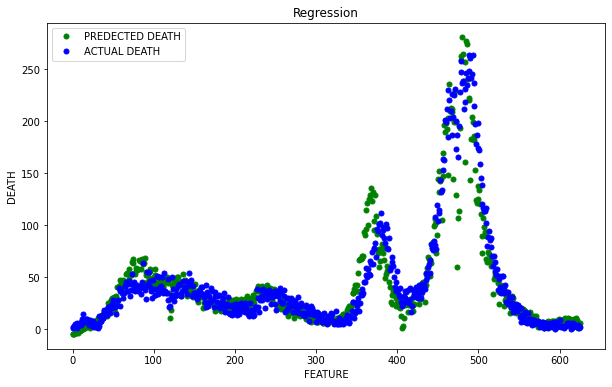

In [ ]:
yp = reg.predict(x)
plt.rcParams["figure.figsize"] = (10,6) 
plt.plot( yp , color='green', marker='o', linestyle='',
     linewidth=0, markersize=5)
plt.plot( y, color='blue', marker='o', linestyle='',
     linewidth=0, markersize=5)
plt.xlabel('FEATURE')
plt.ylabel('DEATH')
plt.title('Regression')
plt.legend(["PREDECTED DEATH", "ACTUAL DEATH"]) 
plt.savefig('/content/linear.png', dpi=300, bbox_inches='tight')
plt.show()

IMPORT CLASSIFICATION DATASET

In [ ]:
df=pd.read_csv("/content/classification_dataset.csv")
df.head(400)

,LAB_TEST,CONFIRMED,DEATH,DENGER_LEVEL
0,434,9,2,LOW_RISK
1,367,18,1,LOW_RISK
2,468,35,3,LOW_RISK
3,679,41,5,LOW_RISK
4,981,54,3,LOW_RISK
...,...,...,...,...
395,21984,1914,61,SIGNIFICANT_RISK
396,20284,1742,50,SIGNIFICANT_RISK
397,21585,1822,41,SIGNIFICANT_RISK
398,17013,1682,37,SIGNIFICANT_RISK


In [ ]:
x=df.iloc[:, 0:-1].values
y=df.iloc[:, 3].values

**TRAIN TEST SPLIT**

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25) #,random_state=10

**GAUSSIAN NB**

In [ ]:
G=GaussianNB()#Naive Bayes
G.fit(x_train, y_train)
G.predict(x_test)

array(['SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK', 'LOW_RISK',
       'LOW_RISK', 'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK',
       'HIGH_RISK', 'LOW_RISK', 'LOW_RISK', 'SIGNIFICANT_RISK',
       'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK',
       'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'HIGH_RISK', 'LOW_RISK',
       'LOW_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK', 'LOW_RISK',
       'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK',
       'HIGH_RISK', 'LOW_RISK', 'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK',
       'SIGNIFICANT_RISK', 'LOW_RISK', 'SIGNIFICANT_RISK',
       'SIGNIFICANT_RISK', 'HIGH_RISK', 'SIGNIFICANT_RISK', 'HIGH_RISK',
       'LOW_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK', 'HIGH_RISK',
       'LOW_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK', 'LOW_RISK',
       'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK',
       'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'LOW_RISK', 'HIGH_RISK',
       'SIGNIFICANT_RISK', 'SIGNIFICANT_RISK', 'SIGNIFICANT_RIS

In [ ]:
G.score(x_test, y_test)*100 #Accurecy 

94.26751592356688

In [ ]:
example_measures = np.array([[10000,500,20],[20000,10000,100],[20000,1500,10]]) 
example_measures = example_measures.reshape(len(example_measures),-1)

prediction = G.predict(example_measures)
print(prediction)

['LOW_RISK' 'HIGH_RISK' 'SIGNIFICANT_RISK']


**NEURAL NETWORK**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 900, activation = 'relu')

In [ ]:
mlp = mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Neural Net: ", round(score, 1), "%" )

Accuracy using Neural Net:  81.5 %


In [ ]:
example_measures = np.array([[10000,500,20],[20000,10000,100],[20000,1500,10]])
example_measures = example_measures.reshape(len(example_measures),-1)

prediction = mlp.predict(example_measures)
print(prediction)

['LOW_RISK' 'HIGH_RISK' 'SIGNIFICANT_RISK']


In [ ]:
y_pred = G.predict(x_test)
pr = classification_report(y_test, y_pred)
print(pr)


y1_pred = mlp.predict(x_test)
pr = classification_report(y_test, y1_pred)
print(pr)

                  precision    recall  f1-score   support

       HIGH_RISK       0.90      0.90      0.90        20
        LOW_RISK       1.00      0.90      0.95        52
SIGNIFICANT_RISK       0.92      0.98      0.95        85

        accuracy                           0.94       157
       macro avg       0.94      0.93      0.93       157
    weighted avg       0.95      0.94      0.94       157

                  precision    recall  f1-score   support

       HIGH_RISK       0.92      0.60      0.73        20
        LOW_RISK       0.94      0.65      0.77        52
SIGNIFICANT_RISK       0.76      0.96      0.85        85

        accuracy                           0.82       157
       macro avg       0.88      0.74      0.78       157
    weighted avg       0.84      0.82      0.81       157



# ***Time Series Analysis***

In [ ]:
dataset = '/content/covid_dataset.csv'
df = pd.read_csv(dataset, parse_dates=["Day"], index_col="Day")
df

,Lab Test,Confirmed case,Death Case
Day,,,
2020-04-04,434,9,2
2020-04-05,367,18,1
2020-04-06,468,35,3
2020-04-07,679,41,5
2020-04-08,981,54,3
...,...,...,...
2021-12-16,25203,257,3
2021-12-17,16310,191,2
2021-12-18,13991,122,4


In [ ]:
#df.index
#df['2021-06-30']

In [ ]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df['2021-06'].head()

,Lab Test,Confirmed case,Death Case
Day,,,
2021-06-01,18250,1765,41
2021-06-02,20259,1988,34
2021-06-03,16972,1687,30
2021-06-04,18151,1887,34
2021-06-05,13115,1447,43


In [ ]:
model_ARIMA = ARIMA(df['Death Case'].values, order=(1, 1, 1))
#order = (p,d,q)
#p = Number of lag observations in the model
#d = Number of times that the raw observations are differenced
#q = Size of the moving average window

model_ARIMA = model_ARIMA.fit()

In [ ]:
prediction = model_ARIMA.predict(len(df),len(df)+10) #typ='levels'
prediction

array([1.81755578, 1.85154045, 1.84520998, 1.84638919, 1.84616953,
       1.84621045, 1.84620283, 1.84620424, 1.84620398, 1.84620403,
       1.84620402])

In [ ]:
#plot_acf(df['Death Case'])

In [ ]:
#plot_pacf(df['Death Case'])